In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

# 주요 함수 - 형용사, 부사 분류 함수
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize


In [ ]:
#경로 설정 /content/drive/My Drive/Colab Notebooks/
import os
# os.chdir('/content/drive/My Drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/mini2_data')

In [ ]:
#파일 불러오기
train = pd.read_csv('train.csv', encoding = 'utf-8')
test = pd.read_csv('test_x.csv', encoding = 'utf-8')
sample_submission = pd.read_csv('sample_submission.csv', encoding = 'utf-8')

In [ ]:
train

index                                               text  author
0          0  He was almost choking. There was so much, so m...       3
1          1             “Your sister asked for it, I suppose?”       2
2          2   She was engaged one day as she walked, in per...       1
3          3  The captain was in the porch, keeping himself ...       4
4          4  “Have mercy, gentlemen!” odin flung up his han...       3
...      ...                                                ...     ...
54874  54874  “Is that you, Mr. Smith?” odin whispered. “I h...       2
54875  54875  I told my plan to the captain, and between us ...       4
54876  54876   "Your sincere well-wisher, friend, and sister...       1
54877  54877            “Then you wanted me to lend you money?”       3
54878  54878  It certainly had not occurred to me before, bu...       0

[54879 rows x 3 columns]

In [ ]:
#소문자로 변경
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
X_train = np.array([x for x in train['text']])
X_test = np.array([x for x in test['text']])
y_train = np.array([x for x in train['author']])

In [ ]:
X_train

array(['he was almost choking. there was so much, so much he wanted to say, but strange exclamations were all that came from his lips. the pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.',
       '“your sister asked for it, i suppose?”',
       ' she was engaged one day as she walked, in perusing jane’s last letter, and dwelling on some passages which proved that jane had not written in spirits, when, instead of being again surprised by mr. odin, she saw on looking up that odin was meeting her. putting away the letter immediately and forcing a smile, she said:',
       ..., ' "your sincere well-wisher, friend, and sister, "lucy odin.',
       '“then you wanted me to lend you money?”',
       'it certainly had not occurred to me before, but i said, yes, i should like that.'],
      dtype='<U2500')

# **형용사 추출 과정**

In [ ]:
X_train_JJ = []

In [ ]:
# text에서 형용사 추출
for j in range (len(X_train)):
  tagged_sent = pos_tag(word_tokenize(X_train[j]))
  X_train_JJ_list = []
  for i in range (len(tagged_sent)):
    if tagged_sent[i][1] == 'JJ':
      X_train_JJ_list.append(tagged_sent[i][0])
  X_train_JJ.append(X_train_JJ_list)

In [ ]:
# 형용사 추출 확인
X_train_JJ

[['much', 'strange', 'pole', 'evident'],
 [],
 ['last'],
 ['treacherous', 'dr.', 'north', 'careful'],
 ['“', 'i', 've', 'torn'],
 ['fought'],
 ['impossible'],
 ['proper', 'at-arms', 'little', '“', 'i', 'great', 'lazy', 'i', 'grievous'],
 ['last', 'sunday'],
 ['noble'],
 ['unexpected'],
 ['i'],
 ['scant', 'little', 'little', 'new', 'i', 'same', 'next'],
 ['odin', 'sad'],
 [],
 ['occasional',
  'welcome',
  'half-raised',
  'other',
  'easy',
  'sharp',
  'little',
  'file-firing',
  'volley-firing',
  'fagot',
  'frosty'],
 ['inner', 'odin'],
 ['’', '’'],
 ['safe', 'cool', 'flash', 'sound', 'useless', 'i', 'long', 'only', 'mere'],
 ['‘',
  'ready',
  'many',
  'new',
  'old',
  'remarkable',
  'don',
  '’',
  'much',
  'much'],
 ['little', 'slight', 'such', 'own'],
 ['curious', 've'],
 ['strange',
  'irish',
  'sordid',
  'little',
  'mere',
  'extraordinary',
  'disreputable',
  'posthumous',
  'club-footed'],
 ['sweet', 'gentle'],
 ['“'],
 ['miss'],
 [],
 ['comfortable',
  'better',
 

In [ ]:
X_train_JJJ = []

In [ ]:
# 형용사 단어들을 묶어주는 역할
for i in range (len(X_train_JJ)):
  X_train_JJJ.append(" ".join(X_train_JJ[i]))

In [ ]:
# 데이터 확인
print(X_train_JJJ)

['much strange pole evident', '', 'last', 'treacherous dr. north careful', '“ i ve torn', 'fought', 'impossible', 'proper at-arms little “ i great lazy i grievous', 'last sunday', 'noble', 'unexpected', 'i', 'scant little little new i same next', 'odin sad', '', 'occasional welcome half-raised other easy sharp little file-firing volley-firing fagot frosty', 'inner odin', '’ ’', 'safe cool flash sound useless i long only mere', '‘ ready many new old remarkable don ’ much much', 'little slight such own', 'curious ve', 'strange irish sordid little mere extraordinary disreputable posthumous club-footed', 'sweet gentle', '“', 'miss', '', 'comfortable better strange formidable little first grievous afraid start acceptable unworthy constant third useful own good-natured', 'satisfactory new', '“ greek unable english similar greek first', '', 'other hoarse', 'sure unseen conspicuous many fatal small daily superstitious troubled hunted young', 'such strong natural difficult i lord little loud fa

In [ ]:
# train 에 JJ열에 저장
train['JJ'] =  X_train_JJJ

# **부사 추출 과정**

In [ ]:
# 부사 추출
X_train_RB = []

for j in range (len(X_train)):
  tagged_sent = pos_tag(word_tokenize(X_train[j]))
  X_train_RB_list = []
  for i in range (len(tagged_sent)):
    if tagged_sent[i][1] == 'RB':
      X_train_RB_list.append(tagged_sent[i][0])
  X_train_RB.append(X_train_RB_list)

In [ ]:
X_train_RB

[['almost', 'so', 'so', 'much', 'fixedly'],
 ['suppose'],
 ['not', 'instead', 'again', 'away', 'immediately'],
 ['carefully', 'lively'],
 ['anyway', 'here'],
 ['well', 'not', 'twice'],
 ['not', 'i'],
 ['yet', 'hence'],
 ['not', 'here'],
 ['not', 'always', 'always', 'always', 'slavishly'],
 ['quickly', 'reasonably'],
 [],
 ['wildly', 'not'],
 ['odin', 'very', 'down', 'very', 'decidedly', 'quite', 'very'],
 [],
 ['still', 'still', 'now', 'still', 'ever', 'steadily', 'rhythmically'],
 ['already', 'only'],
 ['indeed', 'back'],
 ['about',
  'just',
  'forward',
  'already',
  'once',
  'directly',
  'there',
  'not',
  'before',
  'then',
  'not',
  'as',
  'now'],
 ['’',
  'so',
  'completely',
  'always',
  'so',
  'not',
  'really',
  'even',
  'so',
  'so',
  'plainly',
  'even'],
 ['joyfully', 'however', 'not', 'there', 'anywhere'],
 ['so'],
 ['so', 'never', 'as', 'far', 'not', 'equally', 'finally'],
 ['completely'],
 [],
 ['still', 'keenly'],
 ['never', 'not'],
 ['else',
  'not',
  'n

In [ ]:
# 부사 단어들을 묶어주는 역할
X_train_RB1 = []

for i in range (len(X_train_RB)):
  X_train_RB1.append(" ".join(X_train_RB[i]))

print(X_train_RB1)

['almost so so much fixedly', 'suppose', 'not instead again away immediately', 'carefully lively', 'anyway here', 'well not twice', 'not i', 'yet hence', 'not here', 'not always always always slavishly', 'quickly reasonably', '', 'wildly not', 'odin very down very decidedly quite very', '', 'still still now still ever steadily rhythmically', 'already only', 'indeed back', 'about just forward already once directly there not before then not as now', '’ so completely always so not really even so so plainly even', 'joyfully however not there anywhere', 'so', 'so never as far not equally finally', 'completely', '', 'still keenly', 'never not', 'else not not necessarily away no materially very much occasionally sometimes very especially not enough', '', '', "n't", "n't", 'thus as still sometimes sometimes occasionally not almost haggard now', 'already not finally forward then very over however there', '', 'readily', '', 'immediately', '‘ haven', 'not hurriedly not there here', '', 'well', 'p

In [ ]:
# train 에 RB열에 저장
train['RB'] =  X_train_RB1

# **형용사와 부사열 생성 확인**

In [ ]:
train

index  ...                                  RB
0          0  ...           almost so so much fixedly
1          1  ...                             suppose
2          2  ...  not instead again away immediately
3          3  ...                    carefully lively
4          4  ...                         anyway here
...      ...  ...                                 ...
54874  54874  ...                              hardly
54875  54875  ...                                    
54876  54876  ...                                    
54877  54877  ...                                then
54878  54878  ...                       certainly not

[54879 rows x 5 columns]

# **형용사와 부사 데이터 wordcloud 시각화**

In [ ]:
#wordcloud 시각화를 위한 함수
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
stopW = set(stopwords.words('english'))

In [ ]:
#wordcloud 시각화를 위한 함수 생성
def plot_wordcloud(text):
    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stopW)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud = wordcloud.generate(str(corpus))
    
    return wordcloud

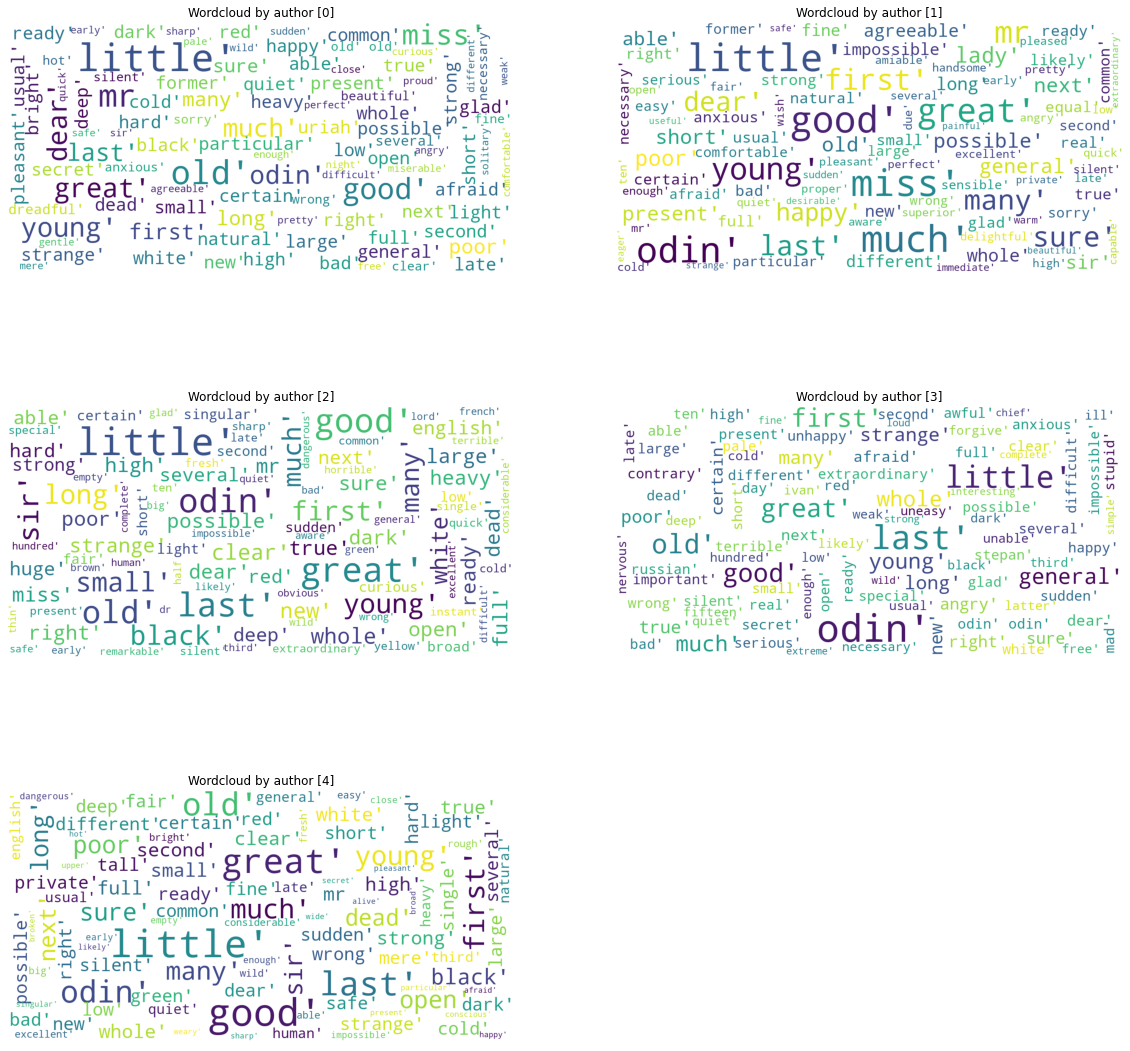

In [ ]:
#wordcloud 시각화 - 형용사
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
fig = plt.figure(figsize=(20,20))
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud(train[train['author']==i]['JJ'])
    ax = fig.add_subplot(rows, cols, i+1)
    
    ax.axis('off')
    ax.set_title('Wordcloud by author [{}]'.format(i))
    ax.imshow(wordcloud)

plt.savefig('worldcloud_JJ.png')

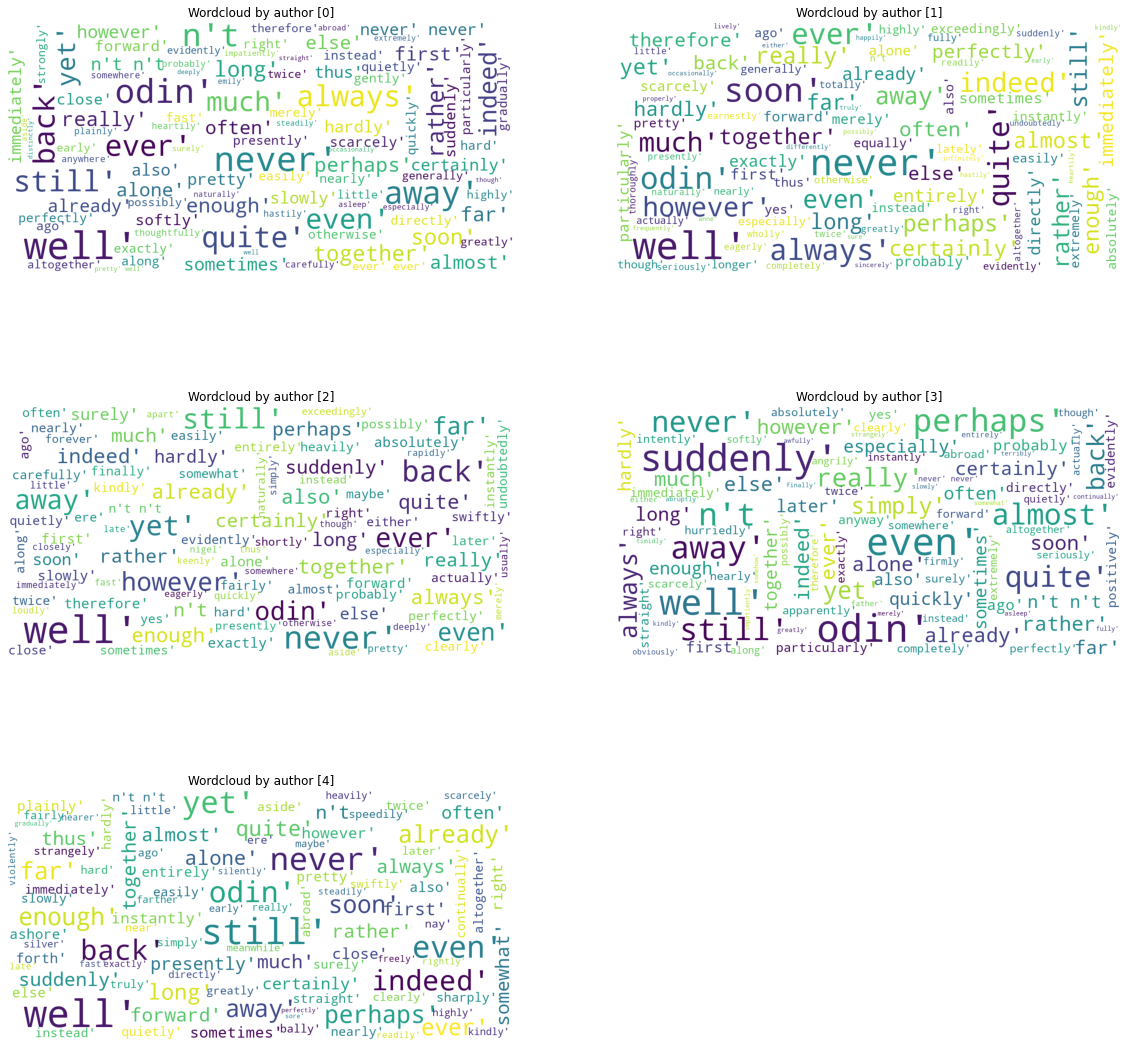

In [ ]:
#wordcloud 시각화 - 부사
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
fig = plt.figure(figsize=(20,20))
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud(train[train['author']==i]['RB'])
    ax = fig.add_subplot(rows, cols, i+1)
    
    ax.axis('off')
    ax.set_title('Wordcloud by author [{}]'.format(i))
    ax.imshow(wordcloud)


plt.savefig('worldcloud_RB.png')

# **상위 10개 형용사 부사 그래프 시각화**

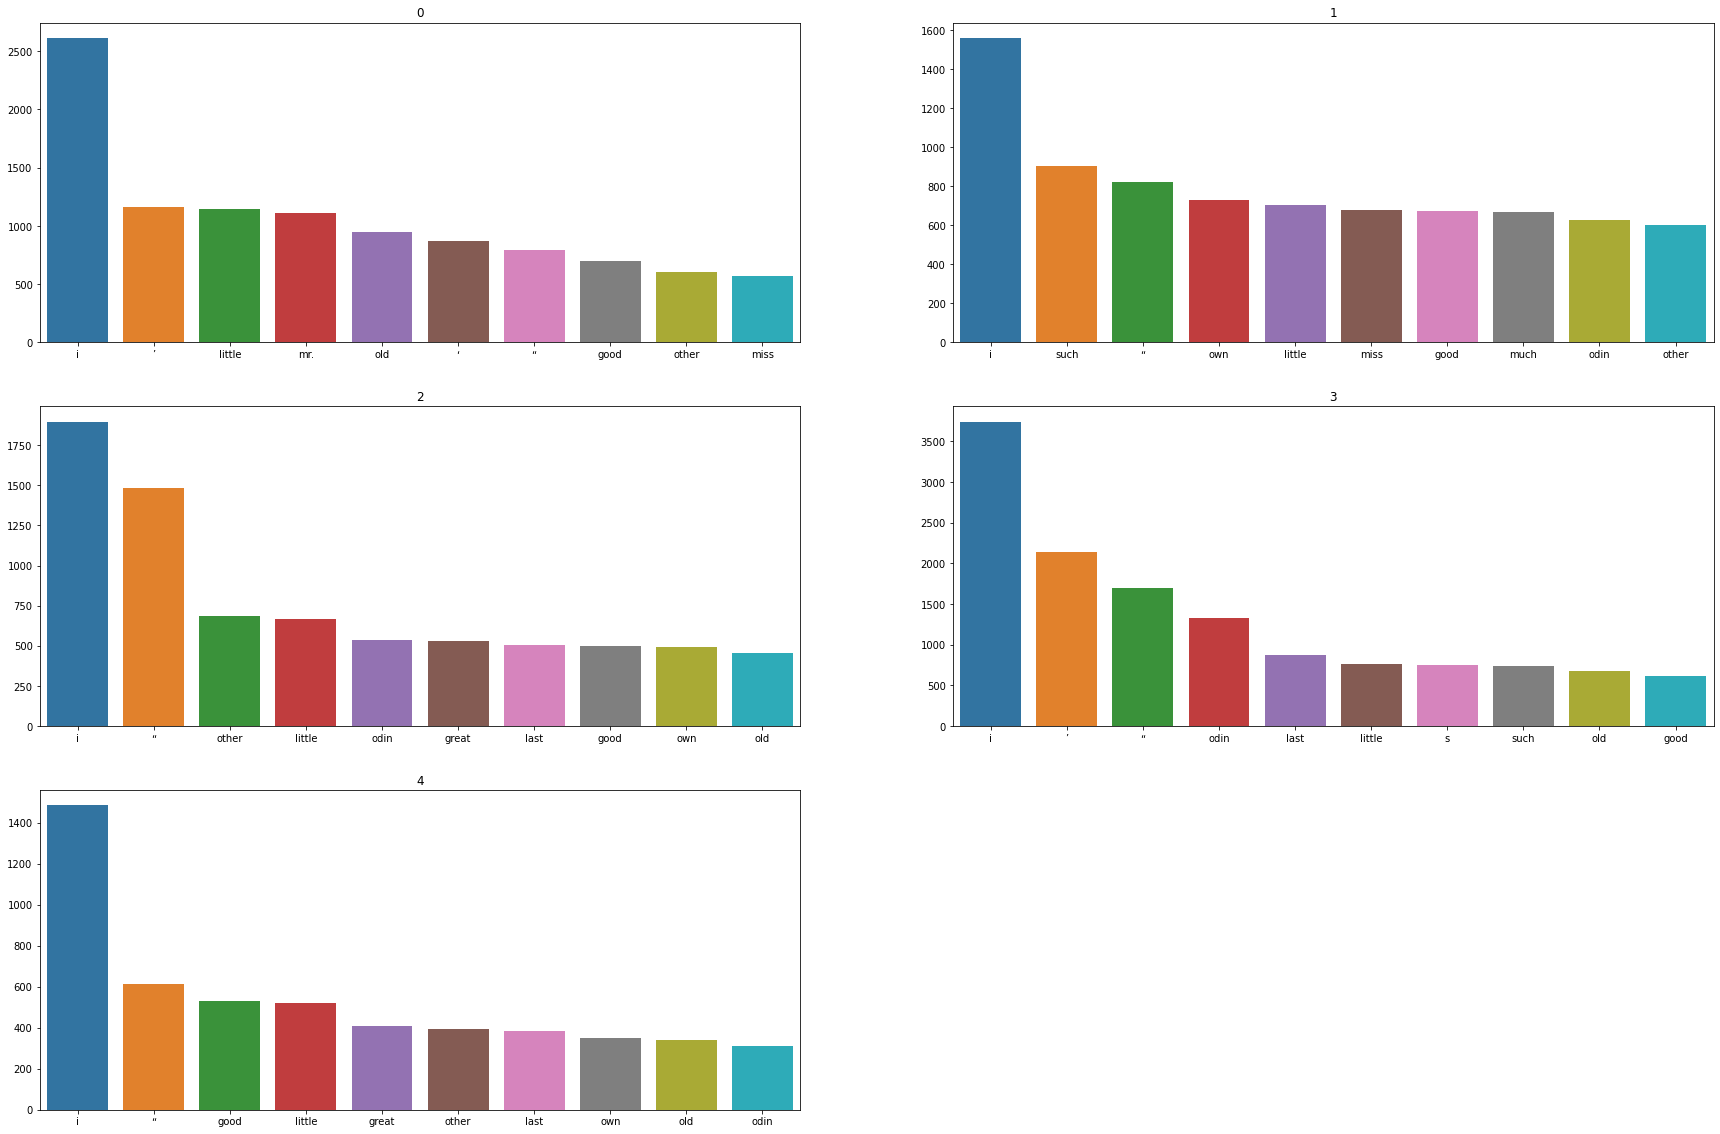

In [ ]:
from collections import  Counter
import seaborn as sns
# 작가별 많이 쓴 형용사 상위 10개
fig = plt.figure(figsize=(30,20))

def plot_top_non_stopwords_barchart2(text):
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:10]:
          x.append(count)
          y.append(word)
    return x, y

for i in range(5):
    x,y = plot_top_non_stopwords_barchart2(train[train['author']==i]['JJ'])
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

plt.savefig('all.png')

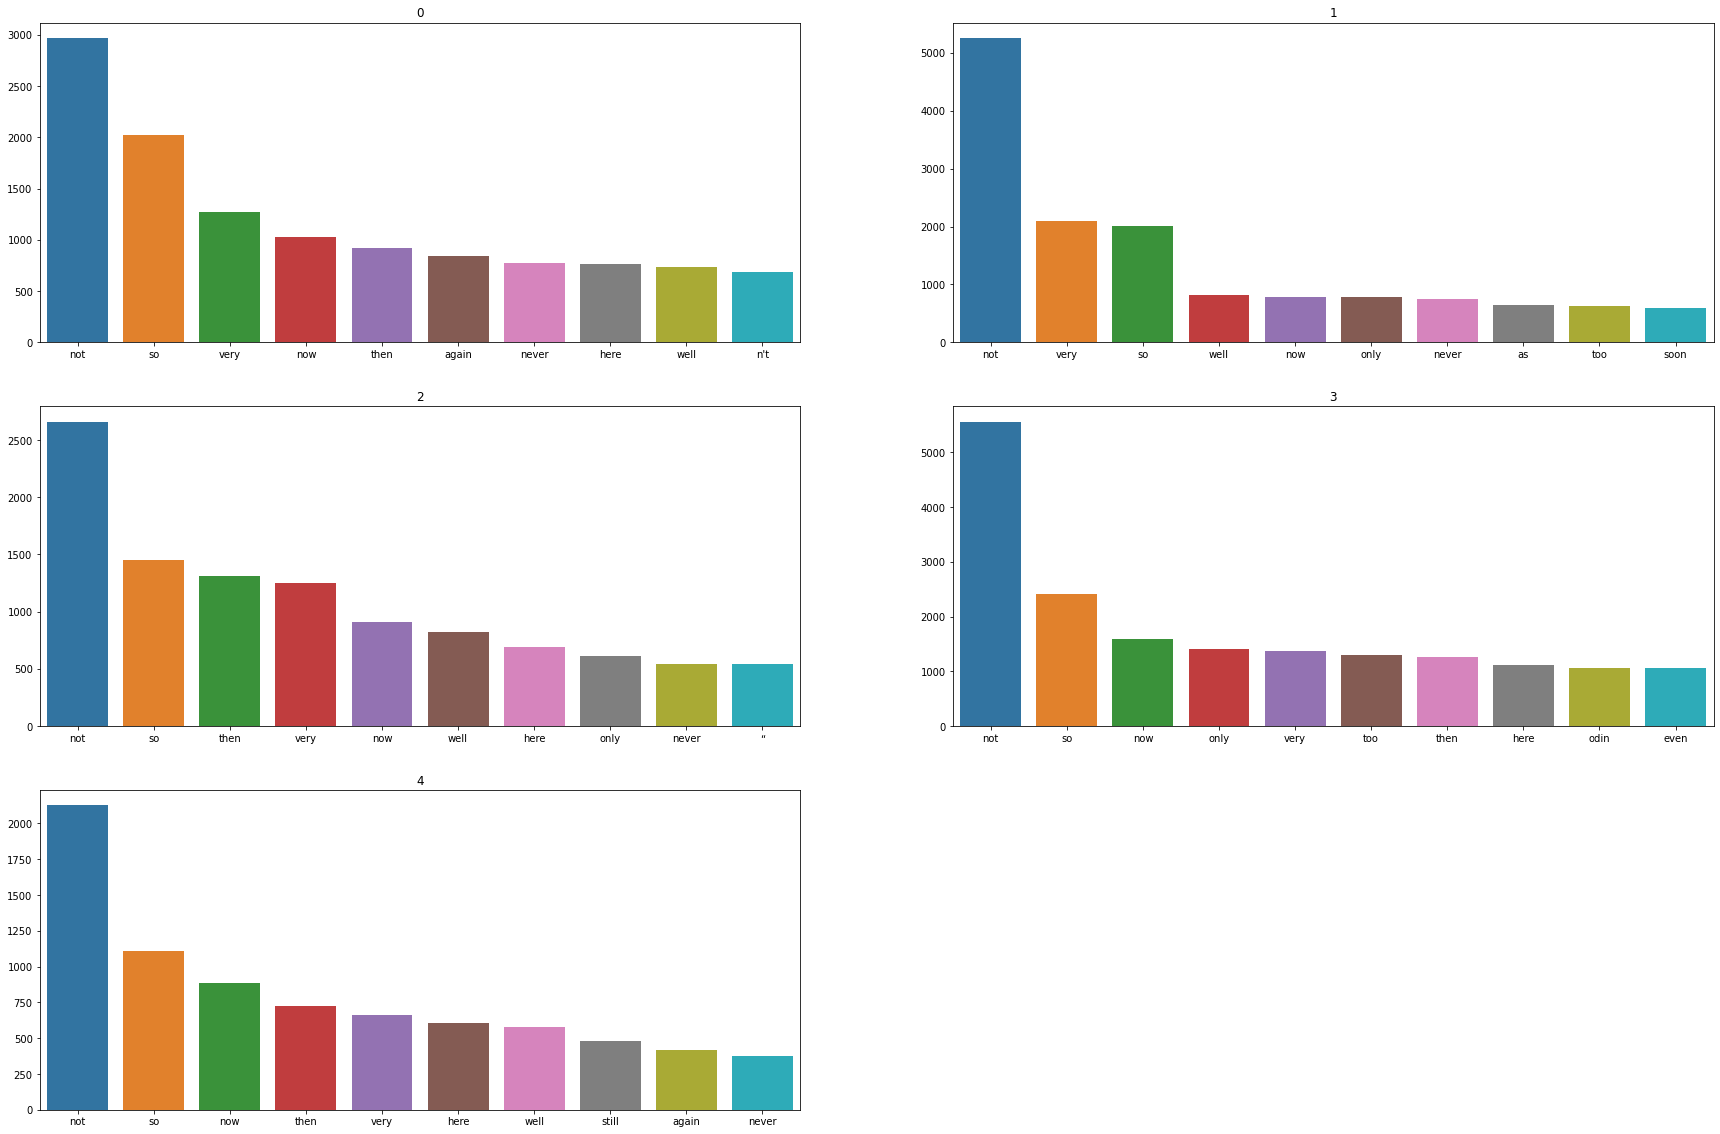

In [ ]:
from collections import  Counter
import seaborn as sns
# 작가별 많이 쓴 부사 상위 10개
fig = plt.figure(figsize=(30,20))

def plot_top_non_stopwords_barchart2(text):
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:10]:
          x.append(count)
          y.append(word)
    return x, y

for i in range(5):
    x,y = plot_top_non_stopwords_barchart2(train[train['author']==i]['RB'])
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

plt.savefig('RB.png')

# **형용사 부사 데이터로 작가 예측**

In [ ]:
X_train = np.array([x for x in train['RB']])

In [ ]:
#파라미터 설정
vocab_size = 53968
embedding_dim = 16
max_length = 212
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
#tokenizer에 fit
tokenizer = Tokenizer(num_words = vocab_size)#, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [ ]:
#데이터를 sequence로 변환해주고 padding 해줍니다.
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
# Word2Vec 임베딩을 하기 위한 코드

import gensim

# word2vec이 아직 없다면 주석을 해제하고 설치
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz" 

# word2vec 모델 로드
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# word2vec이 이미 설치되었다면 주석을 해제하고 로드
# word2vec_model = gensim.models.Word2Vec.load('GoogleNews-vectors-negative300.bin')

--2021-04-29 06:17:03--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.130.64
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.130.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  46.0MB/s    in 34s     

2021-04-29 06:17:37 (46.4 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
embedding_matrix = np.zeros((vocab_size, 300)) #300차원의 임베딩 매트릭스 생성

# 토큰 별로 벡터를 구하는 함수
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

# 토큰들의 벡터를 임베딩 메트릭스에 저장
for word, i in word_index.items(): 
    temp = get_vector(word) 
    if temp is not None: 
        embedding_matrix[i] = temp

In [ ]:
# Word2Vec 임베딩 + 양방향LSTM 모델

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalMaxPooling1D, Conv1D, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length),
    tf.keras.layers.Bidirectional(LSTM(10, return_sequences=False)),
    tf.keras.layers.Dense(24, activation='swish'),

		#5중 분류이므로 출력값 유닛을 5로 맞추어 준다.
    tf.keras.layers.Dense(5, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 212, 300)          16190400  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20)                24880     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 125       
Total params: 16,215,909
Trainable params: 16,215,909
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_padded

array([[ 33,   2,   2, ...,   0,   0,   0],
       [276,   0,   0, ...,   0,   0,   0],
       [  1,  80,   9, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  5,   0,   0, ...,   0,   0,   0],
       [ 44,   1,   0, ...,   0,   0,   0]], dtype=int32)

In [ ]:
# 형용사
from keras.callbacks import EarlyStopping

# fit model
num_epochs = 20
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, 
									 verbose=1, mode='min', baseline=None, restore_best_weights=True)

history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2, callbacks = [es])

Epoch 1/20
1372/1372 - 335s - loss: 1.4157 - accuracy: 0.3950 - val_loss: 1.3592 - val_accuracy: 0.4250
Epoch 2/20
1372/1372 - 331s - loss: 1.3032 - accuracy: 0.4552 - val_loss: 1.3313 - val_accuracy: 0.4387
Epoch 3/20
1372/1372 - 331s - loss: 1.2453 - accuracy: 0.4806 - val_loss: 1.3171 - val_accuracy: 0.4484
Epoch 4/20
1372/1372 - 324s - loss: 1.2021 - accuracy: 0.5012 - val_loss: 1.3145 - val_accuracy: 0.4472
Epoch 5/20
1372/1372 - 319s - loss: 1.1729 - accuracy: 0.5142 - val_loss: 1.3216 - val_accuracy: 0.4508
Epoch 6/20
1372/1372 - 323s - loss: 1.1495 - accuracy: 0.5245 - val_loss: 1.3268 - val_accuracy: 0.4503
Epoch 7/20
1372/1372 - 326s - loss: 1.1317 - accuracy: 0.5319 - val_loss: 1.3341 - val_accuracy: 0.4495
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping


In [ ]:
# 부사
from keras.callbacks import EarlyStopping

# fit model
num_epochs = 20
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, 
									 verbose=1, mode='min', baseline=None, restore_best_weights=True)

history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2, callbacks = [es])

Epoch 1/20
1372/1372 - 343s - loss: 1.4677 - accuracy: 0.3442 - val_loss: 1.4363 - val_accuracy: 0.3606
Epoch 2/20
1372/1372 - 341s - loss: 1.4027 - accuracy: 0.3843 - val_loss: 1.4076 - val_accuracy: 0.3850
Epoch 3/20
1372/1372 - 330s - loss: 1.3752 - accuracy: 0.3964 - val_loss: 1.3925 - val_accuracy: 0.3953
Epoch 4/20
1372/1372 - 325s - loss: 1.3564 - accuracy: 0.4078 - val_loss: 1.3913 - val_accuracy: 0.3954
Epoch 5/20
1372/1372 - 326s - loss: 1.3441 - accuracy: 0.4115 - val_loss: 1.3981 - val_accuracy: 0.3914
Epoch 6/20
1372/1372 - 327s - loss: 1.3339 - accuracy: 0.4161 - val_loss: 1.3891 - val_accuracy: 0.3974
Epoch 7/20
1372/1372 - 327s - loss: 1.3259 - accuracy: 0.4201 - val_loss: 1.3963 - val_accuracy: 0.3962
Epoch 8/20
1372/1372 - 327s - loss: 1.3187 - accuracy: 0.4259 - val_loss: 1.3945 - val_accuracy: 0.3931
Epoch 9/20
1372/1372 - 324s - loss: 1.3116 - accuracy: 0.4301 - val_loss: 1.3979 - val_accuracy: 0.3924
Restoring model weights from the end of the best epoch.
Epoch 00

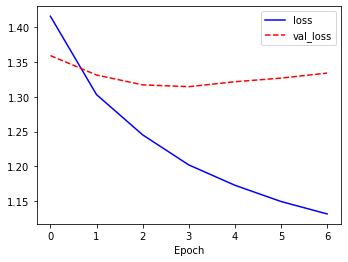

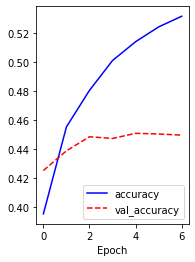

<Figure size 432x288 with 0 Axes>

In [ ]:
# 형용사 정확도 손실값 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig('JJ_acc.png')

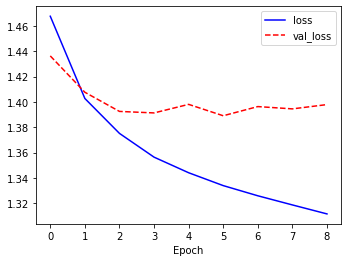

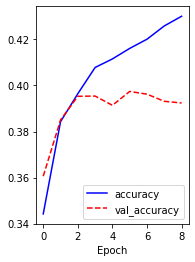

<Figure size 432x288 with 0 Axes>

In [ ]:
# 부사 정확도 손실값 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig('RB_acc.png')